In [1]:
from __future__ import absolute_import, print_function, unicode_literals
from importlib import reload
import pandas as pd
import os
import repackage
from pprint import pprint
repackage.up(2)
import data.microarray_2018_03_21.data as d1
import spot2intensity.ui_grid as ui
from utils import ensure_dir
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_adaptive,sobel
from skimage import filters
from PIL import Image
from functools import reduce
from PIL.ImageOps import autocontrast, equalize
import spot2intensity.spot2intensity as sp
from skimage import feature, exposure, segmentation
#from skimage.segmentation import inverse_gaussian_gradient
                                  
from scipy.ndimage import gaussian_filter


In [17]:
reload(sp)

<module 'spot2intensity.spot2intensity' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/spot2intensity/spot2intensity.py'>

In [18]:
Cols = d1.load_data()

In [19]:

c = Cols['2018_03_21_slide_35']
#c.dump_pickel()

In [41]:
c1 = sp.Spots.load_pickel(c)

In [42]:
c1.df = c1.df[c1.df.circle_qual > 0.3]

In [43]:
#c1.df = c1.df[c1.df.Name == "P095"]

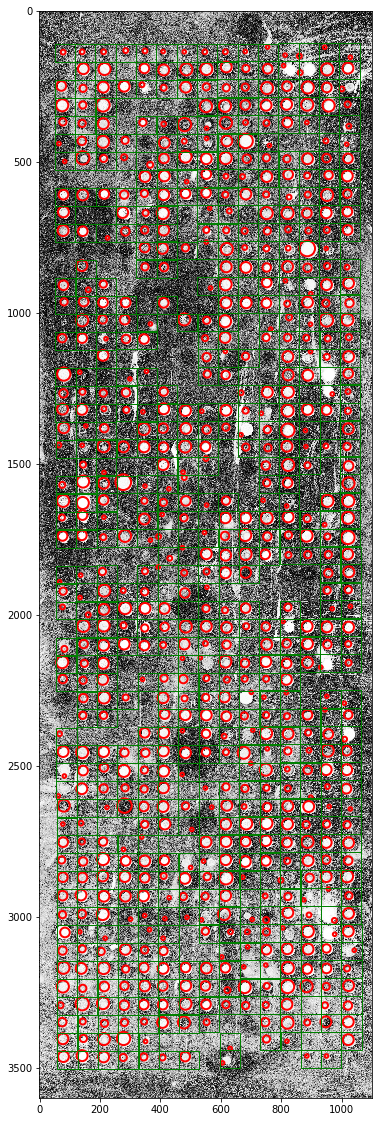

In [44]:

c1.plot_grid(on="a_im",figsize=(10,20))

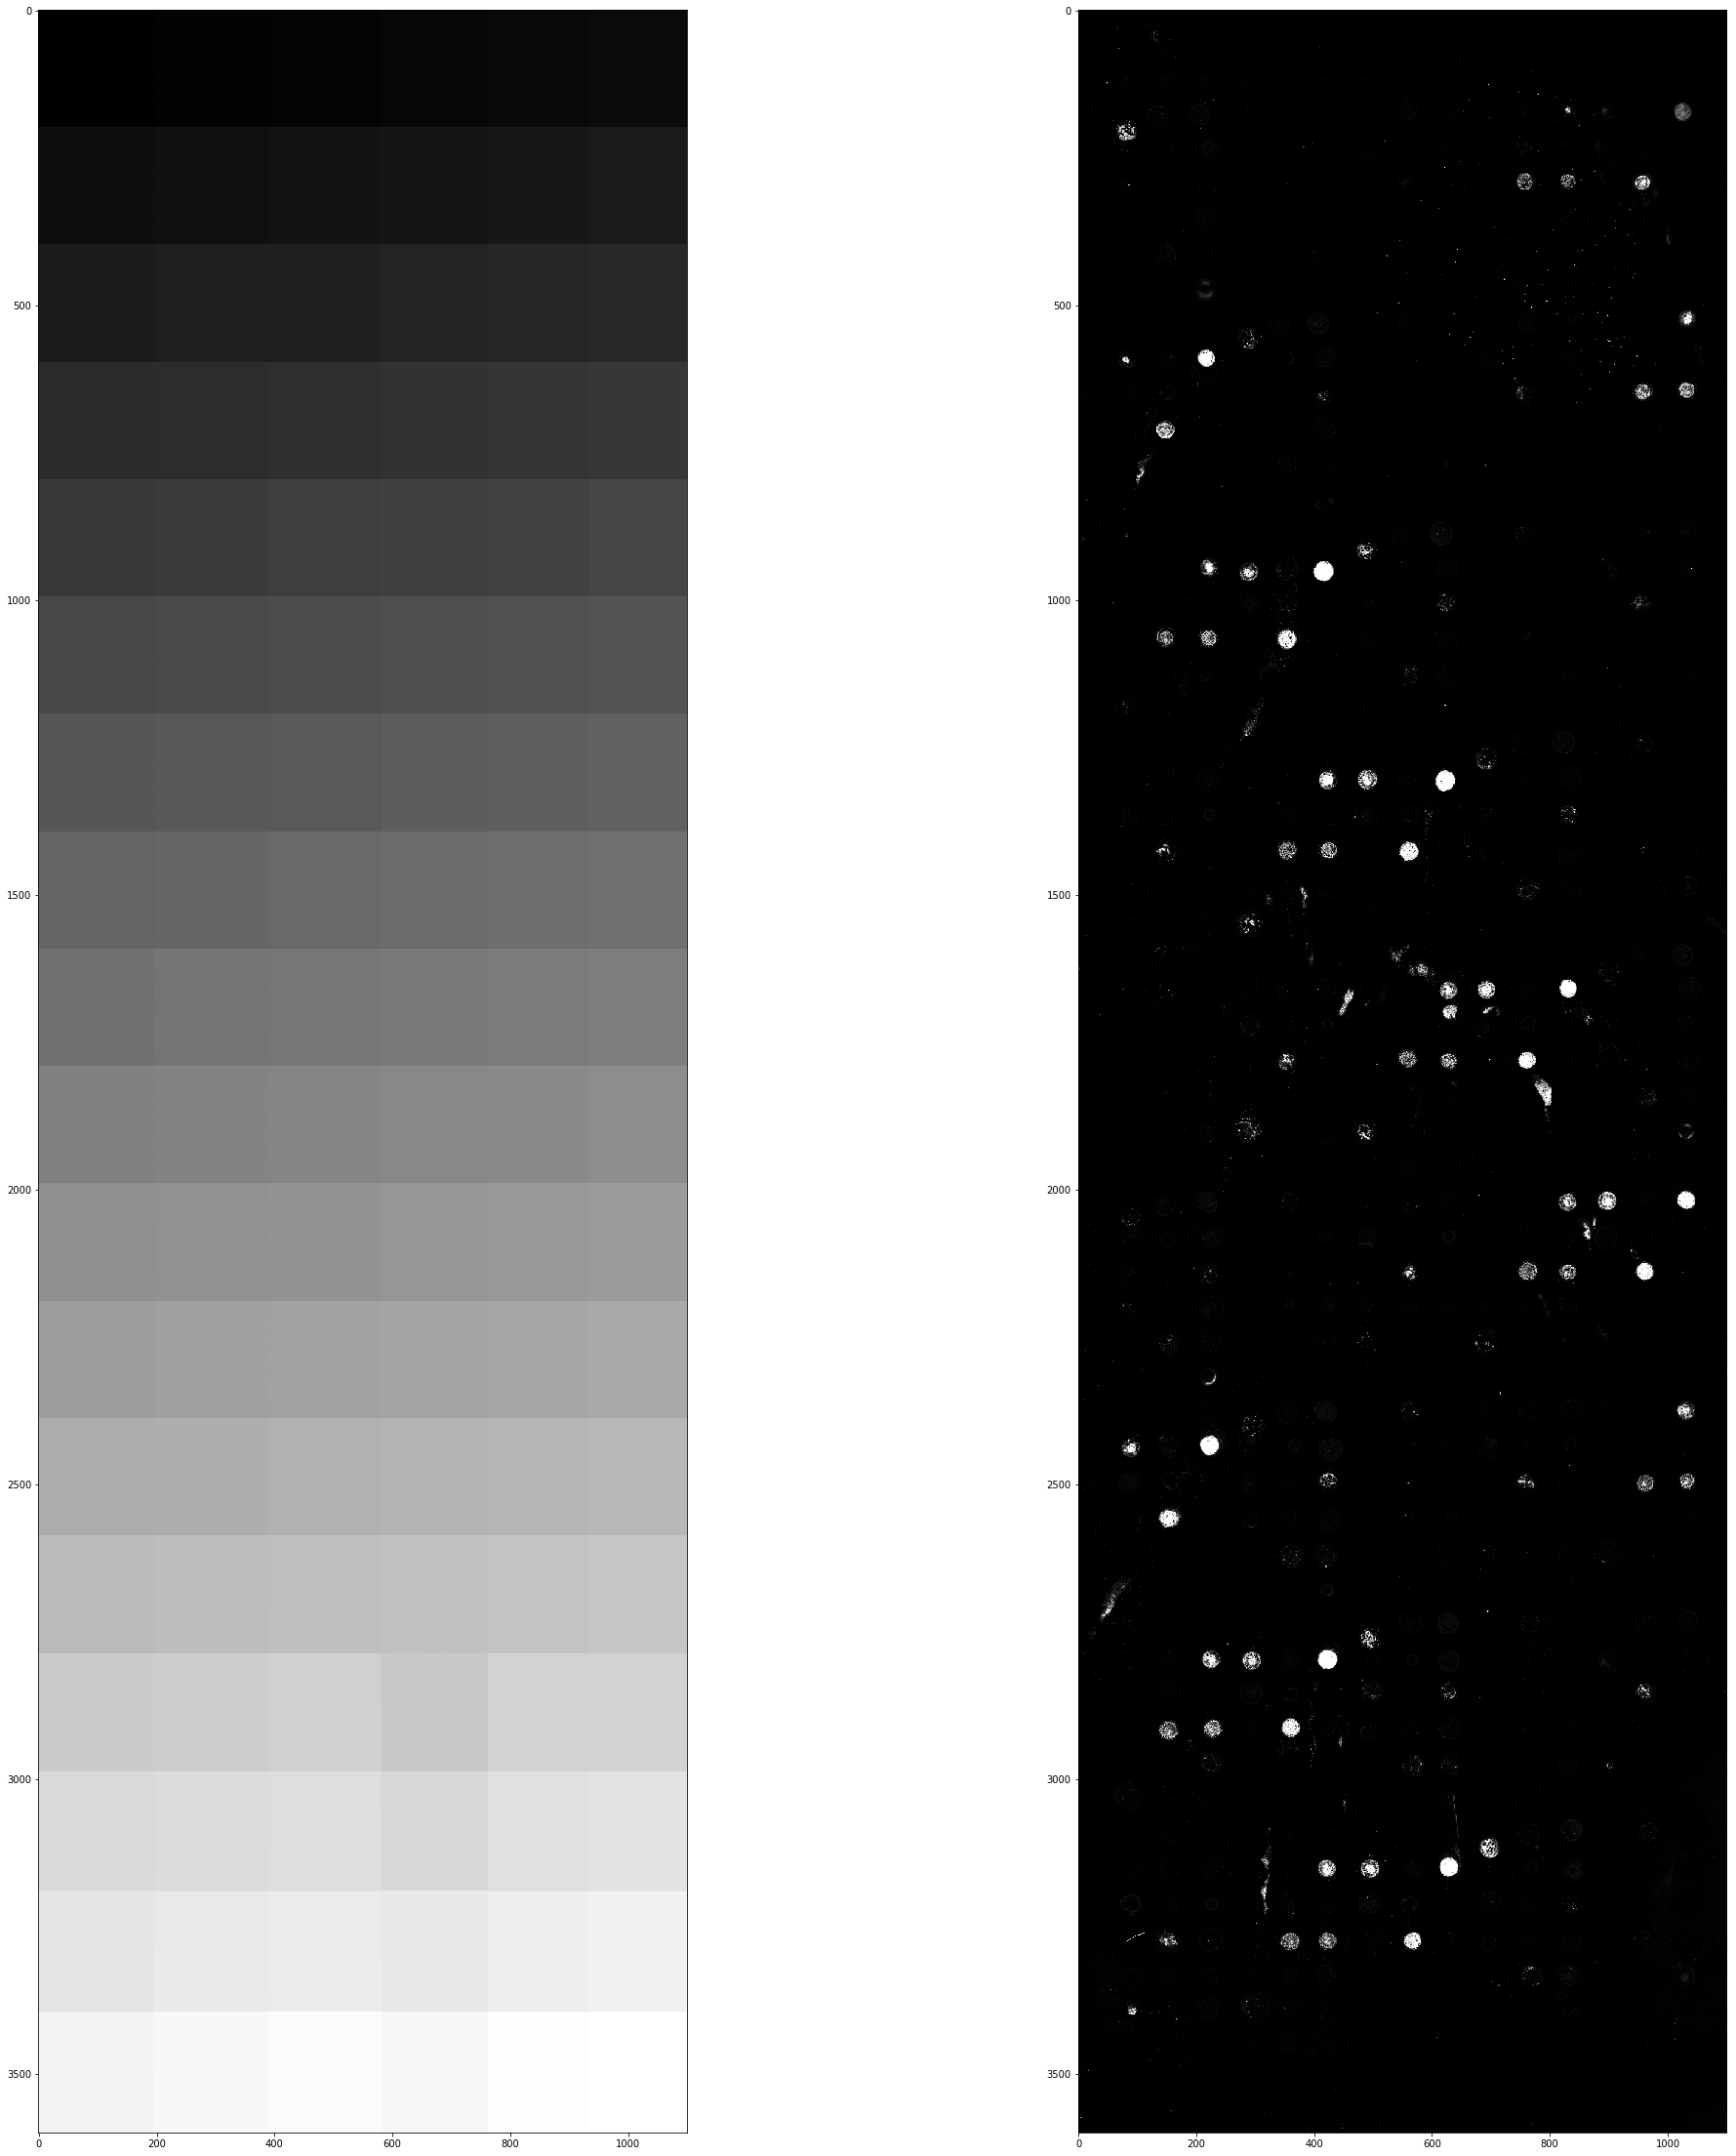

In [13]:
im = np.asarray(c.tifs_a[-1])
block_size = 401
#binary_adaptive = threshold_adaptive(im, block_size, offset=10)
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(35, 40))
axes[0].imshow( segmentation.slic(exposure.equalize_hist(im),),cmap="gray")
axes[1].imshow(im,cmap="gray")

plt.show()

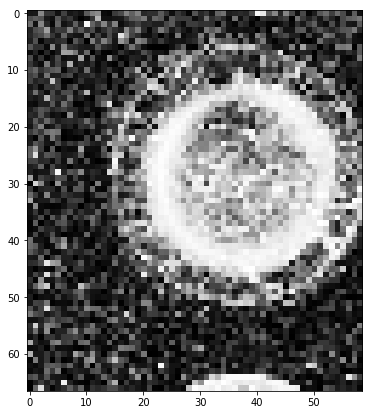

In [78]:
from skimage.feature import blob_dog, blob_log, blob_doh

equilized_image = exposure.equalize_hist(im)
delta_x = int(c.grids[-1].abs_horizontal_spacing)
delta_y = int(c.grids[-1].abs_vertical_spacing)
x,y = c.grids[-1].points[47]
x = int(x)
y = int(y)
rec = sp.create_patches((x, y), delta_x, delta_y)
x0, y0 = rec.xy
x0 = int(x0)
y0 = int(y0)
if x0 < 0:
    x0 = 0
if y0 < 0:
    y0 = 0

img = equilized_image[y0:y0 + delta_x, x0:x0 + delta_y]
edges = filters.sobel(img)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)

#plt.imshow(segmentation.morphological_chan_vese(spot_imag_eq))

In [83]:
from skimage.segmentation import random_walker
markers = np.zeros(img.shape, dtype=np.uint)
markers[img <  0.05] = 1
markers[img > 0.95] = 2
labels = random_walker(img, markers, beta=1000, mode='bf')
from skimage.morphology import watershed
from scipy import ndimage as ndi
segmentation = watershed(sobel(img), markers,)

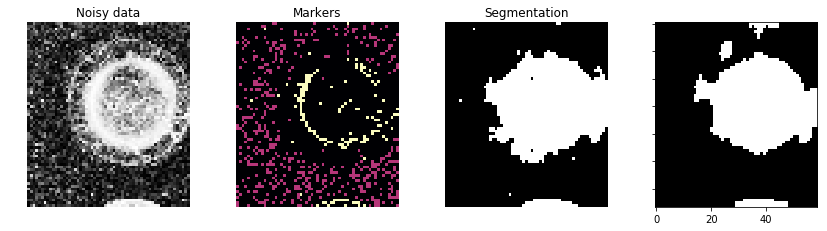

In [89]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(12, 3.2),
                                    sharex=True, sharey=True)
ax1.imshow(img, cmap='gray', interpolation='nearest')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma', interpolation='nearest')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_title('Segmentation')
ax4.imshow(coins_cleaned,cmap='gray')
fig.tight_layout()
plt.show()

In [96]:
label_objects, nb_labels = ndi.label(ndi.binary_fill_holes(segmentation - 1))
sizes = np.bincount(label_objects.ravel())
print(sizes.max())
mask_sizes = sizes.imax()
mask_sizes[0] = 0 
coins_cleaned = mask_sizes[label_objects]

2749


AttributeError: 'numpy.ndarray' object has no attribute 'imax'

In [ ]:
img = gaussian( exposure.equalize_hist(im), 2)

In [22]:
from skimage import exposure
import numpy as np
def histogram_equalize(img):
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    return np.interp(img, bin_centers, img_cdf)

In [23]:
 histogram_equalize(im)

array([[0.02270025, 0.09957677, 0.06067727, ..., 0.01770758, 0.00607121,
        0.16064672],
       [0.19037374, 0.07628813, 0.20556414, ..., 0.00412424, 0.00125051,
        0.00502955],
       [0.04287677, 0.00857677, 0.03181364, ..., 0.00125051, 0.06067727,
        0.11225909],
       ...,
       [0.83949899, 0.87061995, 0.86023561, ..., 0.93566086, 0.93680253,
        0.95602374],
       [0.84202045, 0.87317424, 0.79195354, ..., 0.93093889, 0.95252172,
        0.95957424],
       [0.84607803, 0.84993106, 0.89362475, ..., 0.92944369, 0.96053889,
        0.96528283]])